# Problem Set 4 : 

### Task 1 : First 15 predictions showing the image and the histogram

In [26]:
from __future__ import absolute_import, division, print_function, unicode_literals
%tensorflow_version 2.x
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [27]:
devs =tf.config.experimental.list_physical_devices()

In [28]:
# Check for GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU not found')
print('GPU at: {}'.format(device_name))

GPU at: /device:GPU:0


### Import the MNIST dataset

In [29]:
# Load dataset for mnist 
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Explore the data

In [30]:
print("train images shape:",train_images.shape)
print("train labels shape:",train_labels.shape)
print("test images shape:",test_images.shape)

train images shape: (60000, 28, 28)
train labels shape: (60000,)
test images shape: (10000, 28, 28)


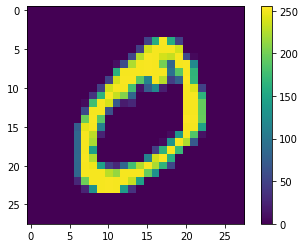

In [31]:
class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']
plt.figure()
# display image using imshow() of matplotlib
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

### Preprocess the data

In [32]:
# normalize images
train_images = train_images/ 255.0
test_images = test_images / 255.0

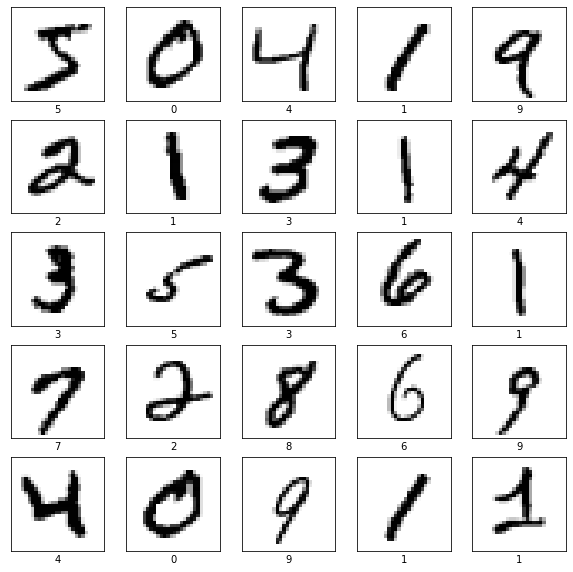

In [33]:
# load images of mnist dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Set up the layers

In [34]:
# Run the model, using Relu activation function followed by softmax
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### Compile the model

In [35]:
# Compile the model using ADAM as the optimizer and sparsr categorical cross entropy loss
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [36]:
%%time
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2577 - accuracy: 0.9257
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1150 - accuracy: 0.9660
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0779 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0589 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0450 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0364 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0277 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0237 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0186 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.016

In [37]:
# Run the model on GPU, using Relu activation function followed by softmax 
with tf.device('/device:GPU:0'):
  gmodel = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
  gmodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
%%time
gmodel.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2596 - accuracy: 0.9267
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1156 - accuracy: 0.9655
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0798 - accuracy: 0.9765
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0591 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0454 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0355 - accuracy: 0.9889
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0285 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0234 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0199 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

### Evaluate accuracy

In [39]:
# Test accuracy evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.9804

Test accuracy: 0.980400025844574


### Make predictions

In [40]:
predictions = model.predict(test_images)
predictions[0]

array([1.8430067e-10, 1.8945807e-10, 2.4258489e-08, 1.7071374e-05,
       4.9527786e-13, 2.1943605e-07, 1.3753848e-16, 9.9998176e-01,
       8.2009621e-10, 9.8555483e-07], dtype=float32)

In [41]:
test_labels[0]

7

In [42]:
# Plot images using below function
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

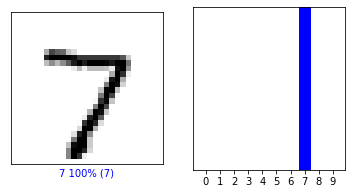

In [43]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

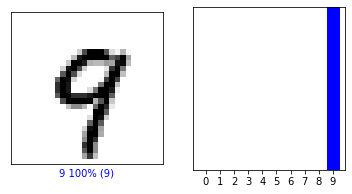

In [44]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

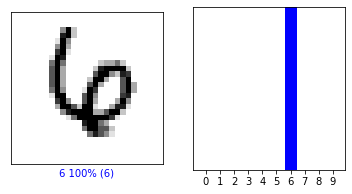

In [45]:
i = 22
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

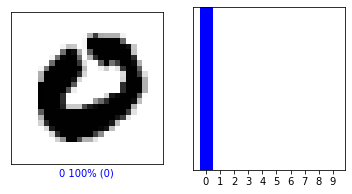

In [46]:
i = 25
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

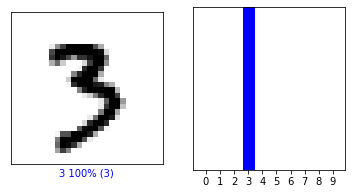

In [47]:
i = 30
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

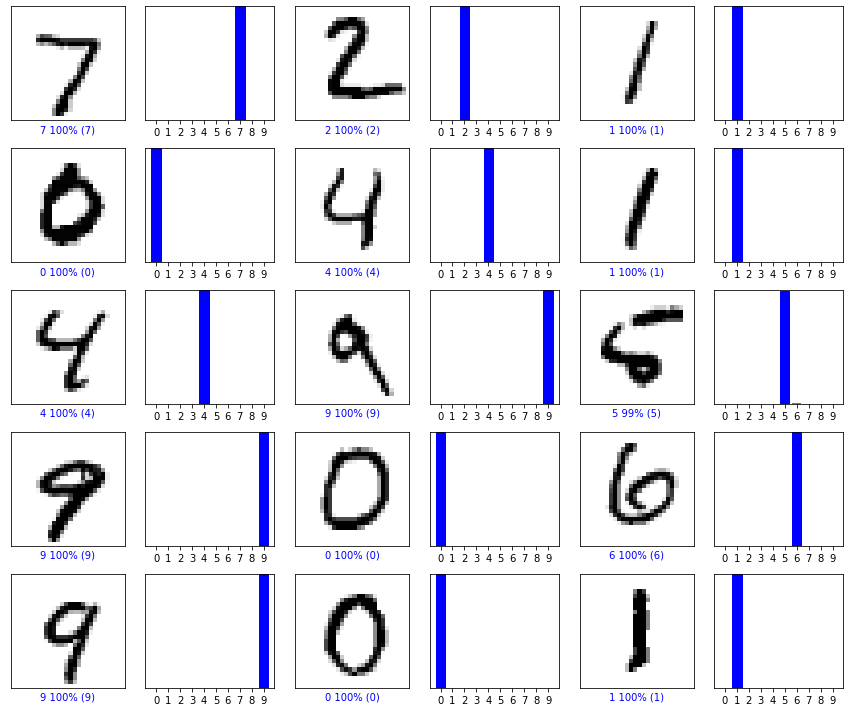

In [48]:
# Plot the first X test images, their predicted labels, and the true labels.
# Correct predictions - blue and incorrect predictions - red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Task 2 :  The first 15 bad predictions again with the image and the histogram

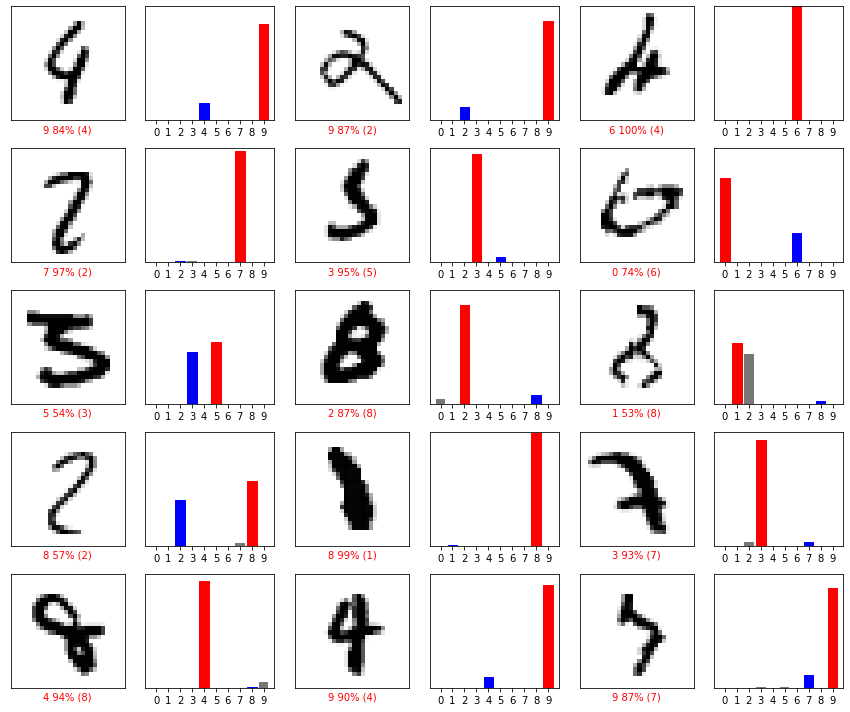

In [49]:
miscl_img = test_images[test_labels != np.argmax(predictions, axis=1)][:15]
correct_lab = test_labels[test_labels != np.argmax(predictions, axis=1)][:15]
miscl_lab = predictions[test_labels != np.argmax(predictions, axis=1)][:15]

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, miscl_lab[i], correct_lab, miscl_img)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, miscl_lab[i], correct_lab)
plt.tight_layout()
plt.show()

### Task 3. The first 15 bad predictions shown as in Ch12.ipynb notebook

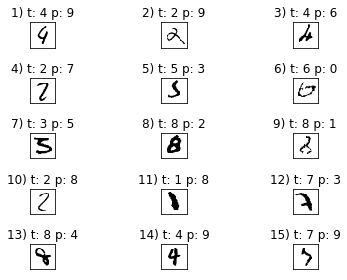

In [50]:
fig, ax = plt.subplots(nrows=5, ncols=3, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(num_images):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], np.argmax(miscl_lab[i])))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()